# 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
insurance = pd.read_csv("../datasets/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
X = insurance.drop(columns=['charges'])
X = pd.get_dummies(X, drop_first=True).astype(float)
y = insurance['charges']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 11 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:00:17   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

**Intercept**: -11940, SE 987.819, p < 0.0001
This is the predicted insurance charge for a customer age 0, bmi 0, 0 children
female, non smoking, and from the north east. Realistically this doesn't mean
anything, but anchors the regression line.

**Age**: 256.8564, SE 11.899, p < 0.0001
Holding all other predictors constant, a 1 year increase in age is attributed
to a $256.86 increase in medical insurance charge. The SE and p value are both
low, indicating a well estimated and statistically significant predictor.

**BMI**: 339.1935, SE 28.599, p < 0.0001
Holding all other predictors constant, a 1-unit increase in BMI is associated with 
an average increase of $339.19 in insurance charges. The SE is modest relative 
to the coefficient, suggesting reasonable precision. The p-value is extremely 
small, indicating strong statistical significance.

**Children**: 475.5005, SE 137.804, p 0.001
Holding all other predictors constant, each additional child is associated with 
an average increase of $475.50 in insurance charges. The SE is somewhat larger relative 
to the coefficient than with age or BMI, indicating more variability in the estimate. 
However, the p-value (0.001) shows this predictor is still statistically significant.

**Sex (Male)**: -131.3144, SE 332.945, p 0.693
Holding all other predictors constant, being male (relative to female) is associated 
with an average decrease of $131.31 in insurance charges. However, the SE is 
large compared to the coefficient, and the p-value is very high (0.693). Thus,
the predictor is not statistically significant.

**Smoker (Yes)**: 23850, SE 413.153, p < 0.0001
Holding all other predictors constant, being a smoker is associated with an average 
increase of approximately $23,850 in insurance charges compared to non-smokers. 
The SE is small relative to the coefficient, and the p-value is extremely small,
indicating statistical significance. This is by far the strongest predictor
in the model due to its effect size and being precisely estimated.

**Region (Northwest)**: -352.9639, SE 476.276, p 0.459
Compared to the Northeast (reference region), living in the Northwest is associated 
with an average decrease of $352.96 in charges, holding other variables constant. 
The SE is larger than the coefficient magnitude and the p-value is high, thus the
predictor is not statistically significant.

**Region (Southeast)**: -1035.0220, SE 478.692, p 0.031
Compared to the Northeast, living in the Southeast is associated with an average 
decrease of $1,035.02 in charges. The SE is moderate relative to the coefficient, 
and the p-value (0.031) indicates statistical significance at the 5% level.

**Region (Southwest)**: -960.0510, SE 477.933, p 0.045
Compared to the Northeast, living in the Southwest is associated with an average 
decrease of $960.05 in charges. The SE is about half the magnitude of the coefficient. 
The p-value (0.045) indicates marginal statistical significance at the 5% level.

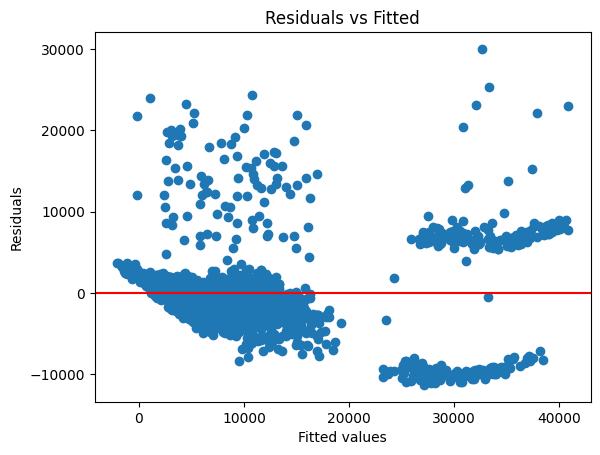

In [4]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

Residuals are clearly not random, indicating a non linear relationship in the model.
This is expected as we can tell from the omnibus / skew statistics.

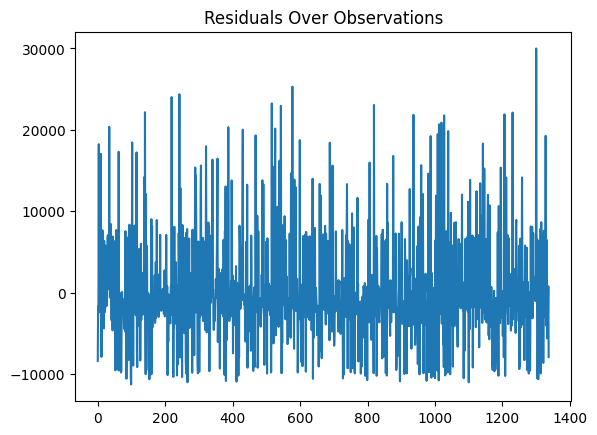

In [6]:
plt.plot(model.resid)
plt.title("Residuals Over Observations")
plt.show()

This is a good indication that there is no autocorrelation, as also indicated
by the DW statistic near 2. Insurance data should not be related to time.

# 2

## a

In [8]:
X = insurance.drop(columns=['charges'])
X = pd.get_dummies(X, drop_first=True).astype(float)
X = X[['age', 'bmi', 'children', 'smoker_yes']]

X['obese'] = (X['bmi'] > 30).astype(float)
X = X.drop(columns=['bmi'])

X_smoker = X[X['smoker_yes'] == 1].drop(columns=['smoker_yes'])
y_smoker = y[X['smoker_yes'] == 1]
X_smoker = sm.add_constant(X_smoker)
model_smoker = sm.OLS(y_smoker, X_smoker).fit()
print(model_smoker.summary())

X_non_smoker = X[X['smoker_yes'] == 0].drop(columns=['smoker_yes'])
y_non_smoker = y[X['smoker_yes'] == 0]
X_non_smoker = sm.add_constant(X_non_smoker)
model_non_smoker = sm.OLS(y_non_smoker, X_non_smoker).fit()
print(model_non_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     690.3
Date:                Wed, 11 Feb 2026   Prob (F-statistic):          2.88e-126
Time:                        16:22:26   Log-Likelihood:                -2655.3
No. Observations:                 274   AIC:                             5319.
Df Residuals:                     270   BIC:                             5333.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e+04    757.111     14.377      0.0

We can see that for a smoker who is also obese (bmi > 30), the coefficient for BMI
is 19990, with an SE of 477 and a p-value < 0.0001. However, for a non smoker 
and the coefficient for obese is 135 with high SE and high p-value. The difference
in coefficient and statistical significance clearly indicates the presence of
an interaction term that is needed.

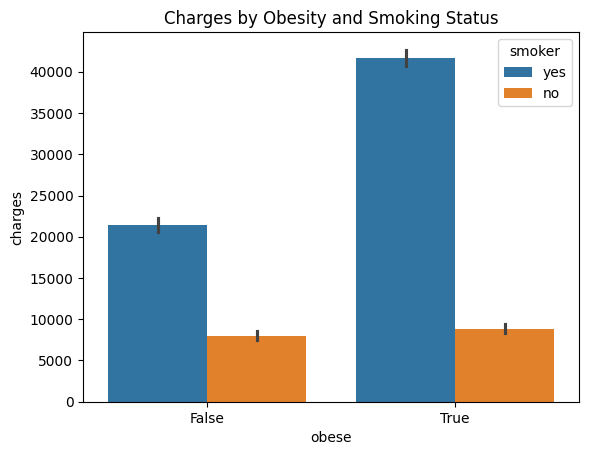

In [9]:
import seaborn as sns

df_plot = insurance.copy()
df_plot["obese"] = (df_plot["bmi"] > 30)

sns.barplot(
    data=df_plot,
    x="obese",
    y="charges",
    hue="smoker"
)

plt.title("Charges by Obesity and Smoking Status")
plt.show()

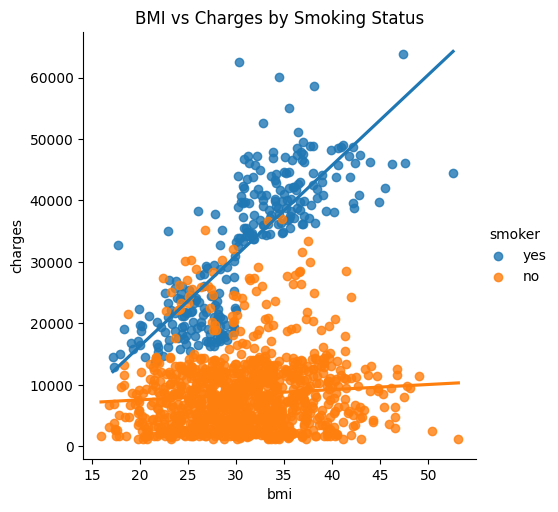

In [10]:
sns.lmplot(
    data=df_plot,
    x="bmi",
    y="charges",
    hue="smoker",
    ci=None
)

plt.title("BMI vs Charges by Smoking Status")
plt.show()

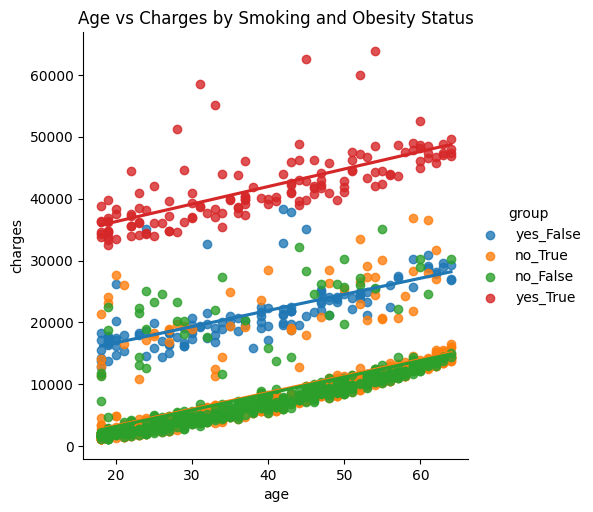

In [12]:
df_plot["group"] = (
    df_plot["smoker"] + "_" + df_plot["obese"].astype(str)
)

sns.lmplot(
    data=df_plot,
    x="age",
    y="charges",
    hue="group",
    ci=None
)
plt.title("Age vs Charges by Smoking and Obesity Status")
plt.show()

The graphs distinctly show the separation between people who smoke and are obese
and their respective insurance charges. The interaction term between smoking 
and obesity is crucial to the model.

## b

In [13]:
X = insurance.drop(columns=['charges'])
X = pd.get_dummies(X, drop_first=True).astype(float)
X = X[['age', 'bmi', 'children', 'smoker_yes']]

X['obese'] = (X['bmi'] > 30).astype(float)
X = X.drop(columns=['bmi'])

# Add interaction term
X['smoker_obese'] = X['smoker_yes'] * X['obese']
X = sm.add_constant(X)
model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1680.
Date:                Wed, 11 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:27:18   Log-Likelihood:                -13147.
No. Observations:                1338   AIC:                         2.631e+04
Df Residuals:                    1332   BIC:                         2.634e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2670.0560    399.933     -6.676   

The interaction effect model is stronger, with an R^2 of 0.863 compared to
the separate fitted models R^2 of 0.885 and 0.408. Although the R^2 is slightly
lower, we still prefer the interaction model. The split models showed that
obesity effect is massive for smokers, while negligible for non smokers. However,
the models reduce sample size and prevent formal testing of a slope difference. 
For non-obese individuals a person who smokes (smoking coefficient) on average 
is predicted to have $13400 more in insurance charges. This predictor is 
statistically significant. For  non-smokers and obese person on average is 
predicted only to have a $135 increase in charge. With a p-value of 0.626, this 
is not statistically significant. But, we can see that the interaction term has 
a coefficient of 19870, the most impactful predictor in the model, and has a 
low SE and extremely low p-value indicating statistical significance. While we 
can tell from the smaller smoking and obese coefficients that these factors 
alone matter, the interaction term is what affects the model the strongest. Thus,
we prefer the interaction term model.

## c

The interaction term specifically represents the predicted increase in insurance 
charges associated with obesity, which is $19,870 larger for smokers than for 
non-smokers, while holding age and number of children constant. 

**LLM Usage**: All work was done by myself in VSCode with [GitHub Copilot integration](https://code.visualstudio.com/docs/copilot/overview). The integration "provides code suggestions, explanations, and automated implementations based on natural language prompts and existing code context," and also offers autonomous coding and an in-IDE chat interface that is able to interact with the current codebase. Only the Copilot provided automatic inline suggestions for both LaTex and Python in `.tex` and `.ipynb` Jupyter notebook files respectively were taken into account / used.